In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2, f_classif

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# !conda install -c conda-forge odfpyr

In [3]:
filepath = "../dados/Registros Administrativos/dados_registros_administrativos_total_2012_2017.xlsx.xlsx"
df = pd.read_excel(filepath, sheet_name="MUNICÍPIO")

In [4]:
df.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,...,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,...,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,...,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,...,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,...,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,...,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


In [5]:
df.ANO.unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [6]:
columns = ['ANO','IBGE7','PMATPUB_EF','PMATPUB_EM','PMATPRI_EF','PMATPRI_EM','IDEB_AI','IDEB_AF',
'REN_PIBPC_D','REN_VAPC_D','REN_PVAAGR','REN_PVAIND','REN_PVAADM','REN_PVASERV','REN_RENSF_D',
'PDEFSAN','PANALF15','PFOCOS','PFLORA','POP_TOT']

In [7]:
def reg_adm_query(ano, df = df):
    '''
    this function filter the dataframe "registros administrativos" by the
    year (ano) indicated as input and by the columns of the list columns
    '''
    df_ano = df.loc[df['ANO'].isin([ano])]
#     df_ano = df.query("""ANO == {}""".format(ano))
    df_ano = df_ano.loc[:, columns]
    return df_ano, df_ano.isnull().sum()

In [8]:
reg_adm_query(2017)[1]

ANO               0
IBGE7             0
PMATPUB_EF        0
PMATPUB_EM        9
PMATPRI_EF     2551
PMATPRI_EM     3993
IDEB_AI          94
IDEB_AF         108
REN_PIBPC_D    5570
REN_VAPC_D     5570
REN_PVAAGR     5570
REN_PVAIND     5570
REN_PVAADM     5570
REN_PVASERV    5570
REN_RENSF_D       0
PDEFSAN         121
PANALF15          2
PFOCOS          141
PFLORA            0
POP_TOT           0
dtype: int64

In [9]:
df_2017 = reg_adm_query(2017)[0].loc[:,['IBGE7','PMATPUB_EF','PMATPUB_EM','PMATPRI_EF','PMATPRI_EM',
                                        'IDEB_AI','IDEB_AF','REN_RENSF_D','PDEFSAN','PANALF15','PFOCOS',
                                        'PFLORA','POP_TOT']]

In [10]:
df_2016 = reg_adm_query(2016)[0].loc[:,['IBGE7','REN_PIBPC_D','REN_VAPC_D',
                                        'REN_PVAAGR','REN_PVAIND','REN_PVAADM','REN_PVASERV']]

In [11]:
reg_adm = df_2017.merge(df_2016, how = 'left', on = 'IBGE7')

In [12]:
reg_adm.loc[:,['PMATPUB_EM','PMATPRI_EF','PMATPRI_EM']] = reg_adm.loc[:,['PMATPUB_EM','PMATPRI_EF','PMATPRI_EM']].fillna(0)

In [13]:
reg_adm.isnull().sum()

IBGE7            0
PMATPUB_EF       0
PMATPUB_EM       0
PMATPRI_EF       0
PMATPRI_EM       0
IDEB_AI         94
IDEB_AF        108
REN_RENSF_D      0
PDEFSAN        121
PANALF15         2
PFOCOS         141
PFLORA           0
POP_TOT          0
REN_PIBPC_D      0
REN_VAPC_D       0
REN_PVAAGR       0
REN_PVAIND       0
REN_PVAADM       0
REN_PVASERV      0
dtype: int64

In [14]:
corr = reg_adm.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,IBGE7,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,PANALF15,PFOCOS,PFLORA,POP_TOT,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV
IBGE7,1.000000,0.001632,-0.054308,-0.001631,0.077805,0.478019,0.465429,0.348774,-0.385198,-0.382792,-0.114497,-0.345330,-0.002698,0.386994,0.394022,0.280119,0.204061,-0.576314,0.195387
PMATPUB_EF,0.001632,1.000000,0.627067,-1.000000,-0.748335,0.021668,0.048130,-0.240702,0.281022,0.093127,0.017151,0.137697,-0.267579,-0.099063,-0.073874,0.414320,-0.225280,0.243168,-0.590887
PMATPUB_EM,-0.054308,0.627067,1.000000,-0.627067,-0.847673,-0.104260,-0.066858,-0.235424,0.229818,0.134262,-0.009473,0.100318,-0.208240,-0.129889,-0.111097,0.244396,-0.183583,0.245471,-0.428833
PMATPRI_EF,-0.001631,-1.000000,-0.627067,1.000000,0.748335,-0.021667,-0.048129,0.240702,-0.281022,-0.093126,-0.017151,-0.137697,0.267579,0.099063,0.073874,-0.414320,0.225280,-0.243168,0.590887
PMATPRI_EM,0.077805,-0.748335,-0.847673,0.748335,1.000000,0.126671,0.079797,0.295621,-0.261481,-0.182135,0.014367,-0.118057,0.246320,0.159534,0.136912,-0.307430,0.229264,-0.299421,0.529006
IDEB_AI,0.478019,0.021668,-0.104260,-0.021667,0.126671,1.000000,0.789798,0.241829,-0.387467,-0.459735,-0.127984,-0.334295,0.015834,0.323112,0.323550,0.106616,0.246509,-0.532042,0.308709
IDEB_AF,0.465429,0.048130,-0.066858,-0.048129,0.079797,0.789798,1.000000,0.226554,-0.316410,-0.397118,-0.076251,-0.211811,0.001054,0.311675,0.313240,0.160338,0.196737,-0.472520,0.214145
REN_RENSF_D,0.348774,-0.240702,-0.235424,0.240702,0.295621,0.241829,0.226554,1.000000,-0.309377,-0.332719,0.041783,-0.151413,0.238126,0.593688,0.572443,-0.049624,0.480209,-0.553317,0.285003
PDEFSAN,-0.385198,0.281022,0.229818,-0.281022,-0.261481,-0.387467,-0.316410,-0.309377,1.000000,0.358663,0.135227,0.372337,-0.089795,-0.322653,-0.313718,0.087175,-0.321522,0.505920,-0.437691
PANALF15,-0.382792,0.093127,0.134262,-0.093126,-0.182135,-0.459735,-0.397118,-0.332719,0.358663,1.000000,0.042266,0.220298,-0.081927,-0.300268,-0.296419,-0.092072,-0.228869,0.493272,-0.292304


In [15]:
reg_adm.head()

,IBGE7,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,PANALF15,PFOCOS,PFLORA,POP_TOT,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV
0,1100015,100.00,100.00,0.00,0.00,6.2,4.8,1118.45,50.15,13.02,0.52,65.44,25437,12.44,11.61,36.55,6.88,31.40,25.18
1,1100023,89.42,95.84,10.58,4.16,5.5,4.9,1205.80,13.47,9.72,0.78,31.87,107345,13.69,12.10,7.37,17.95,29.94,44.73
2,1100031,100.00,100.00,0.00,0.00,6.1,5.1,1037.56,17.92,9.87,0.06,28.94,6224,14.08,13.24,46.22,3.62,31.32,18.85
3,1100049,82.46,80.47,17.54,19.53,6.3,5.1,1204.73,20.70,8.43,0.18,36.13,88507,14.69,12.97,10.74,13.15,27.73,48.38
4,1100056,96.31,97.47,3.69,2.53,6.4,5.3,1230.71,10.22,7.04,0.49,65.06,17934,15.09,12.69,15.12,6.41,28.44,50.03


In [16]:
reg_adm.isnull().sum()

IBGE7            0
PMATPUB_EF       0
PMATPUB_EM       0
PMATPRI_EF       0
PMATPRI_EM       0
IDEB_AI         94
IDEB_AF        108
REN_RENSF_D      0
PDEFSAN        121
PANALF15         2
PFOCOS         141
PFLORA           0
POP_TOT          0
REN_PIBPC_D      0
REN_VAPC_D       0
REN_PVAAGR       0
REN_PVAIND       0
REN_PVAADM       0
REN_PVASERV      0
dtype: int64

In [17]:
# municipios apenas da amazonia legal
filename_AL = """../dados/Publicacoes/lista_de_municipios_Amazonia_Legal_2020.ods"""
AL = pd.read_excel(filename_AL, engine='odf').loc[:,['CD_MUN','NM_MUN']]
AL.rename(columns = {"CD_MUN": "IBGE7"}, inplace = True)

In [18]:
AL.head()

,IBGE7,NM_MUN
0,1100015,Alta Floresta D'Oeste
1,1100023,Ariquemes
2,1100031,Cabixi
3,1100049,501506818
4,1100056,Cerejeiras


In [19]:
# aqui deixamos apenas os municipios da amazonia legal
reg_adm = AL.merge(reg_adm, how='left', on='IBGE7')

In [20]:
reg_adm.isnull().sum()

IBGE7           0
NM_MUN          0
PMATPUB_EF      0
PMATPUB_EM      0
PMATPRI_EF      0
PMATPRI_EM      0
IDEB_AI         7
IDEB_AF        12
REN_RENSF_D     0
PDEFSAN         0
PANALF15        0
PFOCOS          0
PFLORA          0
POP_TOT         0
REN_PIBPC_D     0
REN_VAPC_D      0
REN_PVAAGR      0
REN_PVAIND      0
REN_PVAADM      0
REN_PVASERV     0
dtype: int64

## Acrescentamos o IDH (2010)

In [21]:
cols_censo = ['Codmun7', 'ANO', 'IDHM']
df_censo = pd.read_excel("../dados/CENSO/Censo_municipal_estadual_nacional.xlsx", 
                         sheet_name = "MUN 91-00-10").loc[:, cols_censo]

In [22]:
# here we filter the data to only get IDH of 2010 (more updated)
df_censo = df_censo.query('''ANO == 2010''')

In [23]:
# rename columns to make their meaning more apparent
df_censo.rename(columns = {"Codmun7": "IBGE7", 
                           "IDHM": "IDHM_2010"}, inplace = True)

In [24]:
cols_censo2 = ['IBGE7', 'IDHM_2010']
df_censo = df_censo.loc[:, cols_censo2]

In [25]:
df_censo.head()

,IBGE7,IDHM_2010
11130,1100015,0.641
11131,1100023,0.702
11132,1100031,0.650
11133,1100049,0.718
11134,1100056,0.692


In [26]:
reg_adm.head()

,IBGE7,NM_MUN,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,PANALF15,PFOCOS,PFLORA,POP_TOT,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV
0,1100015,Alta Floresta D'Oeste,100.00,100.00,0.00,0.00,6.2,4.8,1118.45,50.15,13.02,0.52,65.44,25437,12.44,11.61,36.55,6.88,31.40,25.18
1,1100023,Ariquemes,89.42,95.84,10.58,4.16,5.5,4.9,1205.80,13.47,9.72,0.78,31.87,107345,13.69,12.10,7.37,17.95,29.94,44.73
2,1100031,Cabixi,100.00,100.00,0.00,0.00,6.1,5.1,1037.56,17.92,9.87,0.06,28.94,6224,14.08,13.24,46.22,3.62,31.32,18.85
3,1100049,501506818,82.46,80.47,17.54,19.53,6.3,5.1,1204.73,20.70,8.43,0.18,36.13,88507,14.69,12.97,10.74,13.15,27.73,48.38
4,1100056,Cerejeiras,96.31,97.47,3.69,2.53,6.4,5.3,1230.71,10.22,7.04,0.49,65.06,17934,15.09,12.69,15.12,6.41,28.44,50.03


In [27]:
# here we merge with reg_adm data
reg_adm = reg_adm.merge(df_censo, how='left', on='IBGE7')

In [28]:
reg_adm.head()

,IBGE7,NM_MUN,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,...,PFOCOS,PFLORA,POP_TOT,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV,IDHM_2010
0,1100015,Alta Floresta D'Oeste,100.00,100.00,0.00,0.00,6.2,4.8,1118.45,50.15,...,0.52,65.44,25437,12.44,11.61,36.55,6.88,31.40,25.18,0.641
1,1100023,Ariquemes,89.42,95.84,10.58,4.16,5.5,4.9,1205.80,13.47,...,0.78,31.87,107345,13.69,12.10,7.37,17.95,29.94,44.73,0.702
2,1100031,Cabixi,100.00,100.00,0.00,0.00,6.1,5.1,1037.56,17.92,...,0.06,28.94,6224,14.08,13.24,46.22,3.62,31.32,18.85,0.650
3,1100049,501506818,82.46,80.47,17.54,19.53,6.3,5.1,1204.73,20.70,...,0.18,36.13,88507,14.69,12.97,10.74,13.15,27.73,48.38,0.718
4,1100056,Cerejeiras,96.31,97.47,3.69,2.53,6.4,5.3,1230.71,10.22,...,0.49,65.06,17934,15.09,12.69,15.12,6.41,28.44,50.03,0.692


## Adding exportation data

In order to normalize the data and create indicators, we'll divide exportation data of each municipality from legal Amazonia and we'll divide these values by the population of the municipality

In [29]:
filepath_exp = "../dados/Exportacoes/exportacao_AM.csv"
# loading exportation data
df_exp = pd.read_csv(filepath_exp).query('''year == 2020''')
df_exp.loc[:, ['Nome_Município']] = df_exp['city'].apply(lambda x: x[:-5])

In [30]:
df_exp.head()

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight,Nome_Município
13981,2020,1,Belgium,Ourilândia do Norte - PA,7202,Ferro-alloys,72,Iron and steel,Europe,11998661,3566483,Ourilândia do Norte
14091,2020,1,Egypt,Palmeirante - TO,1005,Maize (corn),10,Cereals,Africa (minus MIDDLE EAST),1197904,7940007,Palmeirante
14332,2020,1,Japan,Canarana - MT,1005,Maize (corn),10,Cereals,Asia (minus MIDDLE EAST),1931830,12863077,Canarana
30385,2020,1,Bangladesh,Cuiabá - MT,5201,"Cotton, not carded or combed",52,Cotton,Asia (minus MIDDLE EAST),420611,251471,Cuiabá
30388,2020,1,Bangladesh,Diamantino - MT,5201,"Cotton, not carded or combed",52,Cotton,Asia (minus MIDDLE EAST),971561,535410,Diamantino


In [31]:
filepath_muncode = "../dados/Producao/PAM.xlsx"
# here we load the municipality codes
df_mun = pd.read_excel(filepath_muncode, sheet_name = "Variáveis externas").loc[:,['Código Município Completo', 
                                                                                   'Nome_Município']]

In [32]:
# here we add municipality codes to exportation data
df_exp = df_exp.merge(df_mun, how="left", on="Nome_Município")

In [33]:
# rename columns to make their meaning more apparent
df_exp.rename(columns = {"Código Município Completo": "IBGE7"}, inplace = True)

In [34]:
df_exp.head()

,year,month,country,city,sh4_code,sh4_desc,sh2_code,sh2_desc,economic_block,usd,net_weight,Nome_Município,IBGE7
0,2020,1,Belgium,Ourilândia do Norte - PA,7202,Ferro-alloys,72,Iron and steel,Europe,11998661,3566483,Ourilândia do Norte,1505437.0
1,2020,1,Egypt,Palmeirante - TO,1005,Maize (corn),10,Cereals,Africa (minus MIDDLE EAST),1197904,7940007,Palmeirante,1715705.0
2,2020,1,Japan,Canarana - MT,1005,Maize (corn),10,Cereals,Asia (minus MIDDLE EAST),1931830,12863077,Canarana,2906204.0
3,2020,1,Japan,Canarana - MT,1005,Maize (corn),10,Cereals,Asia (minus MIDDLE EAST),1931830,12863077,Canarana,5102702.0
4,2020,1,Bangladesh,Cuiabá - MT,5201,"Cotton, not carded or combed",52,Cotton,Asia (minus MIDDLE EAST),420611,251471,Cuiabá,5103403.0


In [35]:
exp_cols = ['IBGE7', 'usd', 'net_weight']
df_exp = df_exp.groupby(['year', 'IBGE7']).sum().reset_index()
df_exp = df_exp.loc[:, exp_cols]
df_exp.loc[:, 'IBGE7'] = df_exp.loc[:, ['IBGE7']].astype('int64')

In [36]:
# here we merge with reg_adm data, adding exportation data of the 2020 year
reg_adm = reg_adm.merge(df_exp, how='left', on='IBGE7')

In [37]:
reg_adm.head()

,IBGE7,NM_MUN,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,IDEB_AI,IDEB_AF,REN_RENSF_D,PDEFSAN,...,POP_TOT,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV,IDHM_2010,usd,net_weight
0,1100015,Alta Floresta D'Oeste,100.00,100.00,0.00,0.00,6.2,4.8,1118.45,50.15,...,25437,12.44,11.61,36.55,6.88,31.40,25.18,0.641,56325.0,44860.0
1,1100023,Ariquemes,89.42,95.84,10.58,4.16,5.5,4.9,1205.80,13.47,...,107345,13.69,12.10,7.37,17.95,29.94,44.73,0.702,41283628.0,29765961.0
2,1100031,Cabixi,100.00,100.00,0.00,0.00,6.1,5.1,1037.56,17.92,...,6224,14.08,13.24,46.22,3.62,31.32,18.85,0.650,424240.0,221000.0
3,1100049,501506818,82.46,80.47,17.54,19.53,6.3,5.1,1204.73,20.70,...,88507,14.69,12.97,10.74,13.15,27.73,48.38,0.718,38002889.0,124050692.0
4,1100056,Cerejeiras,96.31,97.47,3.69,2.53,6.4,5.3,1230.71,10.22,...,17934,15.09,12.69,15.12,6.41,28.44,50.03,0.692,150827040.0,494004313.0


In [38]:
reg_adm.columns

Index(['IBGE7', 'NM_MUN', 'PMATPUB_EF', 'PMATPUB_EM', 'PMATPRI_EF',
       'PMATPRI_EM', 'IDEB_AI', 'IDEB_AF', 'REN_RENSF_D', 'PDEFSAN',
       'PANALF15', 'PFOCOS', 'PFLORA', 'POP_TOT', 'REN_PIBPC_D', 'REN_VAPC_D',
       'REN_PVAAGR', 'REN_PVAIND', 'REN_PVAADM', 'REN_PVASERV', 'IDHM_2010',
       'usd', 'net_weight'],
      dtype='object')

In [39]:
# here we create the indicators of exportation data per capita to "normalize" exportation data
reg_adm.loc[:, 'usd'] = reg_adm.loc[:, 'usd']/reg_adm.loc[:, 'POP_TOT']
reg_adm.loc[:, 'net_weight'] = reg_adm.loc[:, 'net_weight']/reg_adm.loc[:, 'POP_TOT']

In [40]:
# rename columns to make their meaning more apparent
reg_adm.rename(columns = {"PMATPUB_EF": "mat_pub_fund", # % matriculas em rede publica EF
                          "PMATPUB_EM": "mat_pub_med",
                         "PMATPRI_EF": "mat_priv_fund", # % matriculas em rede privada EF
                         "PMATPRI_EM": "mat_priv_med",
                         "IDEB_AI": "des_ed_bas", # indice de desenvolvimento da educacao basica 1 - 5 ano
                         "IDEB_AF": "des_ed_bas2", # indice de desenvolvimento da educacao basica 6 - 9 ano
                         "REN_PIBPC_D": "PIB_mun", # PIB do municipio per capita
                         "REN_VAPC_D": "valor_add", # valor adicionado per capita
                         "REN_PVAAGR": "VA_agropec", # participacao da agropecuaria no valor adicionado (VA)
                          "REN_PVAIND": "VA_indus", # participacao da industria no valor adicionado (VA)
                          "REN_PVAADM": "VA_adm_pub", # participacao da administracao publica no valor adicionado (VA)
                          "REN_PVASERV": "VA_servicos", # participacao do setor servicos no valor adicionado (VA)
                          "REN_RENSF_D": "rend_setor_formal", # Rendimento médio no setor formal 
                          "PDEFSAN": "saneamento", # % pessoas sem abastecimento de água, esgotamento sanitário e coleta de lixo adequados
                          "PANALF15": "analfabetizacao", # % de analfabetos com 15 anos ou mais de idade no Cadastro Único 
                          "PFOCOS": "part_queimadas", # participação do município no total de queimadas do Brasil
                          "PFLORA": "flora_natural", # percentual da área do município que é coberta por vegetação natural
                          "usd": "exp_usd_PC", # total de exportacoes do ano 2020 em usd per capita
                          "net_weight": "exp_weight_PC", # total de exportacoes do ano 2020 em peso per capita
                         }, inplace = True)

In [41]:
reg_adm.columns

Index(['IBGE7', 'NM_MUN', 'mat_pub_fund', 'mat_pub_med', 'mat_priv_fund',
       'mat_priv_med', 'des_ed_bas', 'des_ed_bas2', 'rend_setor_formal',
       'saneamento', 'analfabetizacao', 'part_queimadas', 'flora_natural',
       'POP_TOT', 'PIB_mun', 'valor_add', 'VA_agropec', 'VA_indus',
       'VA_adm_pub', 'VA_servicos', 'IDHM_2010', 'exp_usd_PC',
       'exp_weight_PC'],
      dtype='object')

# Modelo de seleção de features com os dados de registros administrativos

Para construir o modelo iremos utilizar apenas features numericas

In [42]:
features = ['mat_pub_fund', 'mat_pub_med', 'mat_priv_fund',
       'mat_priv_med', 'des_ed_bas', 'des_ed_bas2', 'rend_setor_formal',
       'saneamento', 'analfabetizacao', 'part_queimadas', 'flora_natural',
       'POP_TOT', 'VA_agropec', 'VA_indus', 'VA_adm_pub', 'VA_servicos', 
       'exp_usd_PC', 'exp_weight_PC']

In [43]:
targets = [
'PIB_mun',
'valor_add',
'IDHM_2010'
]

In [44]:
X = reg_adm.loc[:, features]
X.fillna(X.mean(), inplace=True)

In [45]:
# utilizando a lista targets podemos escolher qual a variavel target do modelo de selecao de features:
# 0 - PIB do municipio, 1 - renda VAP, 2 - IDH do municipio
y = reg_adm.loc[:, targets[2]]
y.fillna(y.mean(), inplace=True)

In [46]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k="all")
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(772, 18)


In [47]:
fit = fs.fit(X, y)

In [48]:
fit.scores_

array([2.03743006e+02, 3.88018140e+01, 2.03743006e+02, 1.00177166e+02,
       6.91654005e+02, 4.12780682e+02, 1.34503930e+02, 3.67071495e+02,
       1.43415501e+02, 2.78464488e-02, 5.25397497e+01, 3.98386616e+01,
       1.38754351e+00, 8.54748883e+01, 3.19919810e+02, 2.04805676e+02,
       1.25789598e+01, 2.50295691e+00])

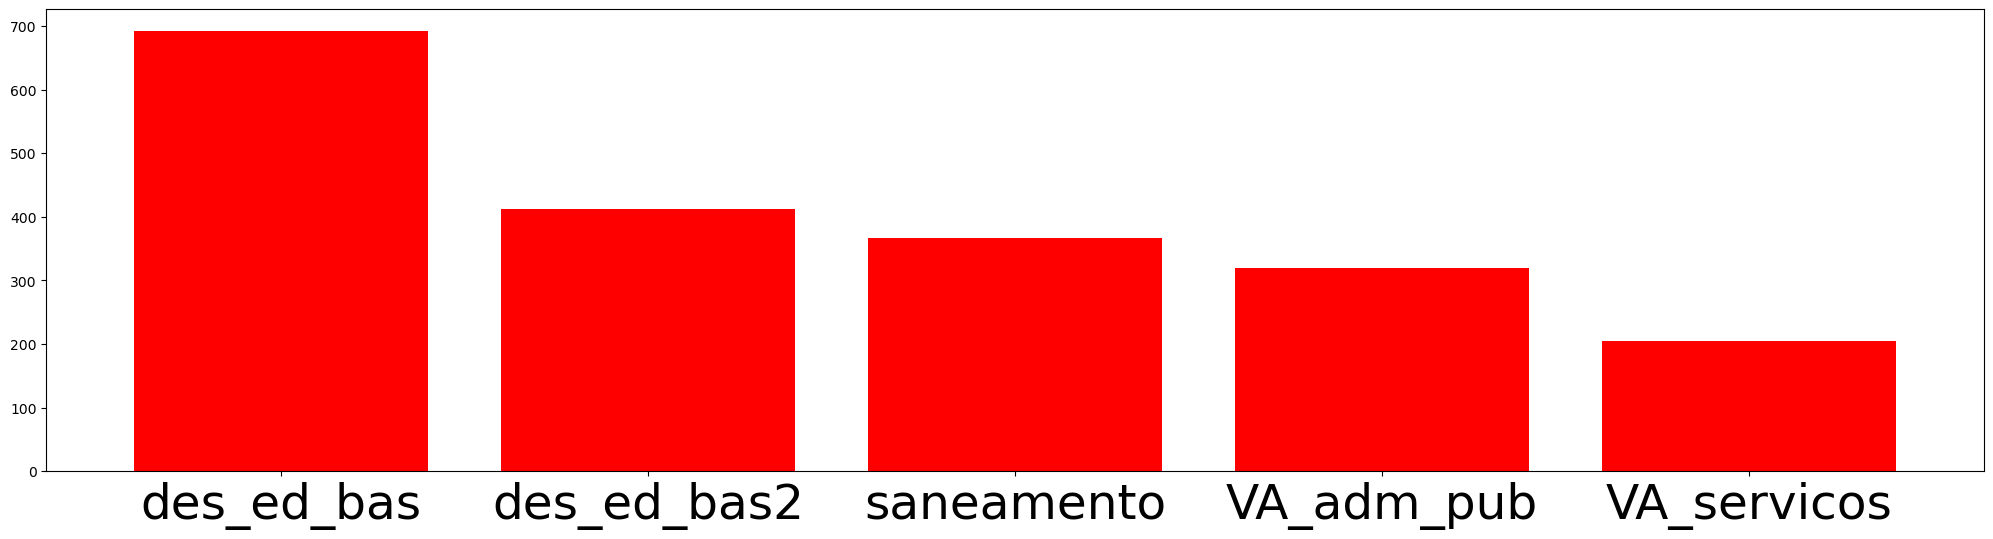

In [49]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(5):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(25, 6))
plt.bar(features, fit.scores_[indices[range(5)]], color='r', align='center')
plt.xticks(fontsize=35, rotation=0)
plt.show();

In [50]:
reg_adm.columns

Index(['IBGE7', 'NM_MUN', 'mat_pub_fund', 'mat_pub_med', 'mat_priv_fund',
       'mat_priv_med', 'des_ed_bas', 'des_ed_bas2', 'rend_setor_formal',
       'saneamento', 'analfabetizacao', 'part_queimadas', 'flora_natural',
       'POP_TOT', 'PIB_mun', 'valor_add', 'VA_agropec', 'VA_indus',
       'VA_adm_pub', 'VA_servicos', 'IDHM_2010', 'exp_usd_PC',
       'exp_weight_PC'],
      dtype='object')

# Acrescentamos os dados de meio ambiente (base_munic_2020)

In [51]:
filepath_amb = "../dados/MUNIC/Base_MUNIC_2020.xlsx"
df_amb = pd.read_excel(filepath_amb, sheet_name = "Meio ambiente")

In [52]:
columns_amb = [
'CodMun', # codigo do municipio
'Mmam25', # ocorrencia de impacto ambiental
'Mmam261', # secas, enxurradas
'Mmam262', # poluicao do ar
'Mmam263', # poluicao de corpo d'agua
'Mmam266', # desmatamento
'Mmam267', # queimada
'Mmam268', # contaminacao do solo
'Mmam2610', # degradacao de areas protegidas
'Mmam2611', # diminuicao de biodiversidade
'Mmam2613' # destinacao inadequada de esgoto domestico
]

In [53]:
df_amb = df_amb.loc[:, columns_amb]

In [54]:
# rename columns to make their meaning more apparent
df_amb.rename(columns = {"CodMun": "IBGE7", 
                        "Mmam25": "imp_amb",
                        "Mmam261": "sec_enx",
                        "Mmam262": "ar_pol",
                        "Mmam263": "ag_pol",
                        "Mmam266": "desmatamento",
                        "Mmam267": "queimada",
                        "Mmam268": "soil_pol",
                        "Mmam2610": "deg_areasp",
                        "Mmam2611": "dim_biod",
                        "Mmam2613": "esgoto_inadeq"}, inplace = True)

In [55]:
df_amb['imp_amb'].unique()

array(['Não', 'Sim', 'Recusa', 'Não informou'], dtype=object)

In [56]:
df_amb['imp_amb'].value_counts()

Sim             3618
Não             1847
Recusa            90
Não informou      15
Name: imp_amb, dtype: int64

In [57]:
# aplicamos get_dummies para tratar variaveis categoricas
df_amb.replace({"Não": int(0), "Sim": int(1), "-": int(0), "Recusa": np.nan, "Não informou": np.nan}, inplace=True)

In [58]:
df_amb.head()

,IBGE7,imp_amb,sec_enx,ar_pol,ag_pol,desmatamento,queimada,soil_pol,deg_areasp,dim_biod,esgoto_inadeq
0,1100015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1100023,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1100031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1100049,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1100056,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# aqui deixamos apenas os municipios da amazonia legal
df_amb = AL.merge(df_amb, how='left', on='IBGE7')

In [60]:
df_amb['imp_amb'].value_counts()

1.0    532
0.0    164
Name: imp_amb, dtype: int64

In [61]:
df_amb.shape

(772, 12)

In [62]:
# vamos excluir os municipios que recusaram informar os impactos ambientais
df_amb.dropna(inplace=True)

In [63]:
df_amb.shape

(696, 12)

In [64]:
df_amb_adm = df_amb.merge(reg_adm, how = 'left', on = 'IBGE7')

In [65]:
df_amb_adm.head()

,IBGE7,NM_MUN_x,imp_amb,sec_enx,ar_pol,ag_pol,desmatamento,queimada,soil_pol,deg_areasp,...,POP_TOT,PIB_mun,valor_add,VA_agropec,VA_indus,VA_adm_pub,VA_servicos,IDHM_2010,exp_usd_PC,exp_weight_PC
0,1100015,Alta Floresta D'Oeste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25437,12.44,11.61,36.55,6.88,31.40,25.18,0.641,2.214294,1.763573
1,1100023,Ariquemes,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,107345,13.69,12.10,7.37,17.95,29.94,44.73,0.702,384.588271,277.292478
2,1100031,Cabixi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6224,14.08,13.24,46.22,3.62,31.32,18.85,0.650,68.161954,35.507712
3,1100049,501506818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,88507,14.69,12.97,10.74,13.15,27.73,48.38,0.718,429.377213,1401.591874
4,1100056,Cerejeiras,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17934,15.09,12.69,15.12,6.41,28.44,50.03,0.692,8410.117096,27545.684900


## Construimos um modelo de selecao de features para variaveis categoricas

In [66]:
targets[0]

'PIB_mun'

In [67]:
reg_adm.loc[:,['IBGE7', targets[0]]].head()

,IBGE7,PIB_mun
0,1100015,12.44
1,1100023,13.69
2,1100031,14.08
3,1100049,14.69
4,1100056,15.09


In [68]:
# o df categorical contem as variaveis categoricas ambientais dos municipios e tambem o target (que pode ser
# PIB ou IDH)
categorical = df_amb.merge(reg_adm.loc[:,['IBGE7', targets[2]]], how = 'left', on = 'IBGE7')

In [69]:
categorical.head()

,IBGE7,NM_MUN,imp_amb,sec_enx,ar_pol,ag_pol,desmatamento,queimada,soil_pol,deg_areasp,dim_biod,esgoto_inadeq,IDHM_2010
0,1100015,Alta Floresta D'Oeste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641
1,1100023,Ariquemes,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.702
2,1100031,Cabixi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650
3,1100049,501506818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.718
4,1100056,Cerejeiras,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692


In [70]:
categorical.columns[2:-1]

Index(['imp_amb', 'sec_enx', 'ar_pol', 'ag_pol', 'desmatamento', 'queimada',
       'soil_pol', 'deg_areasp', 'dim_biod', 'esgoto_inadeq'],
      dtype='object')

In [71]:
categorical.columns[-1]

'IDHM_2010'

In [72]:
X = categorical.loc[:, categorical.columns[2:-1]]
y = categorical.loc[:, categorical.columns[-1]]

In [73]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k="all")
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [74]:
fit = fs.fit(X, y)

In [75]:
fit.scores_

array([0.86723579, 1.24030516, 1.32273457, 1.15913568, 1.04523051,
       1.03463683, 0.58970653, 1.02939722, 0.8321675 , 0.98099605])

In [76]:
len(X.columns)

10

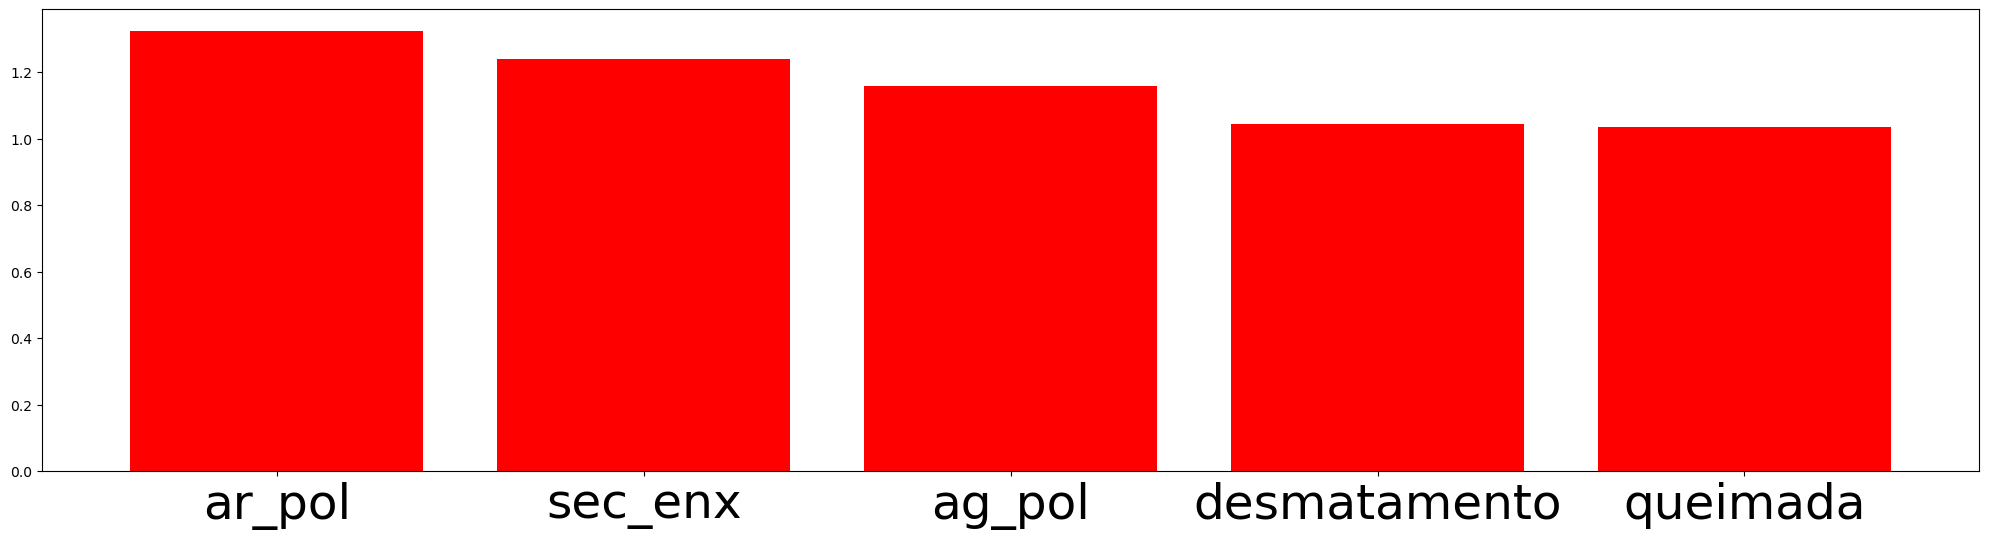

In [77]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get your top 10 feature names
features = []
for i in range(5):
    features.append(X.columns[indices[i]])

# Now plot
plt.figure(figsize=(25, 6))
plt.bar(features, fit.scores_[indices[range(5)]], color='r', align='center')
plt.xticks(fontsize=35, rotation=0)
plt.show();

# Construcao de modelo para integrar variaveis numericas e categoricas (Random forest regressor)

we'll do a left merge using the categorical df as base because there are less data in the categorical df than in the numerical df (reg_adm)

In [78]:
categorical.shape, reg_adm.shape

((696, 13), (772, 23))

In [79]:
AL.shape

(772, 2)

In [80]:
categorical.columns[:-1]

Index(['IBGE7', 'NM_MUN', 'imp_amb', 'sec_enx', 'ar_pol', 'ag_pol',
       'desmatamento', 'queimada', 'soil_pol', 'deg_areasp', 'dim_biod',
       'esgoto_inadeq'],
      dtype='object')

In [81]:
# this df contains numerical and categorical data
df_macro = categorical.loc[:, categorical.columns[:-1]].merge(reg_adm, how = 'left', on = 'IBGE7')

In [82]:
df_macro.head()

,IBGE7,NM_MUN_x,imp_amb,sec_enx,ar_pol,ag_pol,desmatamento,queimada,soil_pol,deg_areasp,...,POP_TOT,PIB_mun,valor_add,VA_agropec,VA_indus,VA_adm_pub,VA_servicos,IDHM_2010,exp_usd_PC,exp_weight_PC
0,1100015,Alta Floresta D'Oeste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25437,12.44,11.61,36.55,6.88,31.40,25.18,0.641,2.214294,1.763573
1,1100023,Ariquemes,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,107345,13.69,12.10,7.37,17.95,29.94,44.73,0.702,384.588271,277.292478
2,1100031,Cabixi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6224,14.08,13.24,46.22,3.62,31.32,18.85,0.650,68.161954,35.507712
3,1100049,501506818,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,88507,14.69,12.97,10.74,13.15,27.73,48.38,0.718,429.377213,1401.591874
4,1100056,Cerejeiras,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17934,15.09,12.69,15.12,6.41,28.44,50.03,0.692,8410.117096,27545.684900


In [83]:
df_macro.columns

Index(['IBGE7', 'NM_MUN_x', 'imp_amb', 'sec_enx', 'ar_pol', 'ag_pol',
       'desmatamento', 'queimada', 'soil_pol', 'deg_areasp', 'dim_biod',
       'esgoto_inadeq', 'NM_MUN_y', 'mat_pub_fund', 'mat_pub_med',
       'mat_priv_fund', 'mat_priv_med', 'des_ed_bas', 'des_ed_bas2',
       'rend_setor_formal', 'saneamento', 'analfabetizacao', 'part_queimadas',
       'flora_natural', 'POP_TOT', 'PIB_mun', 'valor_add', 'VA_agropec',
       'VA_indus', 'VA_adm_pub', 'VA_servicos', 'IDHM_2010', 'exp_usd_PC',
       'exp_weight_PC'],
      dtype='object')

In [84]:
df_macro.isnull().sum()

IBGE7                  0
NM_MUN_x               0
imp_amb                0
sec_enx                0
ar_pol                 0
ag_pol                 0
desmatamento           0
queimada               0
soil_pol               0
deg_areasp             0
dim_biod               0
esgoto_inadeq          0
NM_MUN_y               0
mat_pub_fund           0
mat_pub_med            0
mat_priv_fund          0
mat_priv_med           0
des_ed_bas             6
des_ed_bas2           11
rend_setor_formal      0
saneamento             0
analfabetizacao        0
part_queimadas         0
flora_natural          0
POP_TOT                0
PIB_mun                0
valor_add              0
VA_agropec             0
VA_indus               0
VA_adm_pub             0
VA_servicos            0
IDHM_2010              0
exp_usd_PC           447
exp_weight_PC        447
dtype: int64

we can see that exportation data have a lot of missing values, so we can try building two models: one with exportation data and another without exportation data. Columns: des_ed_bas and des_ed_bas2 have few missing values, so we 'll fill them with the mean columns values

## Random Forest without exportation data

In [85]:
rf_features = [
    'imp_amb', 'sec_enx', 'ar_pol', 'ag_pol',
       'desmatamento', 'queimada', 'soil_pol', 'deg_areasp', 'dim_biod',
       'esgoto_inadeq', 'mat_pub_fund', 'mat_pub_med',
       'mat_priv_fund', 'mat_priv_med', 'des_ed_bas', 'des_ed_bas2',
       'rend_setor_formal', 'saneamento', 'analfabetizacao', 'part_queimadas',
       'flora_natural', 'POP_TOT', 'VA_agropec', 'VA_indus', 'VA_adm_pub', 'VA_servicos'
#        'exp_usd_PC', 'exp_weight_PC' # dados de exportacao (uncomment this line to use them)
]

# target of the model:
# rf_targets[0] to select PIB, 1 - to select valor adicionado and 2 - to IDH
rf_targets = [
    'PIB_mun', 'valor_add', 'IDHM_2010'
]

In [86]:
# we separate the df_macro in X and y

X_rf = df_macro.loc[:, rf_features]

# here we fill nan values with the mean value of each columns for columns: des_ed_bas and des_ed_bas2
X_rf.fillna(X_rf.mean(), inplace = True)
# here we're selecting: PIB as target
y_rf = df_macro.loc[:, rf_targets[2]]

In [87]:
# separamos o dataframe em train e test
train_X, val_X, train_y, val_y = train_test_split(X_rf, y_rf, random_state = 5, shuffle=True)

In [88]:
# modelo random forest de regressao
rf = RandomForestRegressor()
rf.fit(train_X, train_y)

RandomForestRegressor()

In [89]:
pred = rf.predict(val_X)

In [90]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(val_y, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(val_y, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(val_y, pred)))
mape = np.mean(np.abs((val_y - pred) / np.abs(val_y)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.023418349956020695
Mean Squared Error (MSE): 0.0008464754385514845
Root Mean Squared Error (RMSE): 0.02909425095360739
Mean Absolute Percentage Error (MAPE): 3.77
Accuracy: 96.23


In [91]:
corr2 = df_macro.corr()
corr2.style.background_gradient(cmap = 'coolwarm')

,IBGE7,imp_amb,sec_enx,ar_pol,ag_pol,desmatamento,queimada,soil_pol,deg_areasp,dim_biod,esgoto_inadeq,mat_pub_fund,mat_pub_med,mat_priv_fund,mat_priv_med,des_ed_bas,des_ed_bas2,rend_setor_formal,saneamento,analfabetizacao,part_queimadas,flora_natural,POP_TOT,PIB_mun,valor_add,VA_agropec,VA_indus,VA_adm_pub,VA_servicos,IDHM_2010,exp_usd_PC,exp_weight_PC
IBGE7,1.000000,-0.019461,0.186773,0.003436,-0.082343,-0.146925,0.033817,-0.010723,-0.027445,0.015488,-0.163616,-0.115137,0.006200,0.115137,0.021648,0.467590,0.386131,0.389973,-0.259530,-0.002077,0.042226,-0.148810,-0.064125,0.491653,0.490964,0.195114,0.115537,-0.422856,0.178525,0.498875,0.203346,0.031859
imp_amb,-0.019461,1.000000,0.258511,0.207088,0.241852,0.390065,0.637901,0.097932,0.129672,0.104927,0.321785,-0.169268,-0.023135,0.169268,0.170610,-0.024219,-0.065698,0.138003,-0.011347,-0.058251,0.081068,0.070148,0.100289,-0.018883,-0.024824,-0.136659,0.099500,-0.043423,0.138131,0.026988,-0.023977,0.009322
sec_enx,0.186773,0.258511,1.000000,0.078625,-0.028468,-0.079642,0.147460,-0.082124,-0.074832,-0.046833,-0.088091,0.003342,0.045328,-0.003342,-0.041705,0.103227,0.133216,0.019977,-0.033793,0.034099,-0.017508,-0.031518,-0.044036,0.082598,0.084923,0.120666,-0.022356,-0.082781,-0.029144,0.113988,0.002248,-0.025103
ar_pol,0.003436,0.207088,0.078625,1.000000,0.077231,-0.047475,0.041096,-0.040136,-0.087110,0.025707,-0.013878,-0.005170,0.014951,0.005170,0.002314,-0.045465,-0.066050,0.074219,-0.028720,-0.000808,0.059386,0.057711,0.023780,0.022955,0.023537,0.012275,0.015948,0.003283,-0.034006,0.008708,-0.058995,-0.046184
ag_pol,-0.082343,0.241852,-0.028468,0.077231,1.000000,-0.080767,-0.017078,-0.008009,0.004583,0.003708,0.018910,-0.158460,-0.030143,0.158460,0.082317,-0.094055,-0.109665,0.074542,-0.055158,-0.016136,-0.005269,-0.070475,0.066807,-0.032260,-0.037423,-0.136655,0.100841,-0.025859,0.114937,-0.008663,-0.086339,-0.061307
desmatamento,-0.146925,0.390065,-0.079642,-0.047475,-0.080767,1.000000,0.346259,0.018934,0.070387,-0.032326,0.064560,-0.027415,0.008404,0.027415,0.037402,-0.123989,-0.115081,0.022717,0.137765,-0.000085,0.168777,0.112868,0.039312,-0.073070,-0.073668,0.018188,0.015811,-0.000235,-0.036988,-0.152781,0.061865,0.082531
queimada,0.033817,0.637901,0.147460,0.041096,-0.017078,0.346259,1.000000,0.085680,0.072277,0.005483,0.089820,-0.089483,-0.009943,0.089483,0.100779,0.077418,0.056931,0.078262,-0.031940,-0.003905,0.092520,0.062920,0.004840,0.012853,0.010110,-0.068962,0.081153,-0.060773,0.090566,0.075198,0.009993,0.049692
soil_pol,-0.010723,0.097932,-0.082124,-0.040136,-0.008009,0.018934,0.085680,1.000000,-0.003269,0.058730,0.013936,0.034013,-0.002935,-0.034013,0.017828,0.032693,-0.014996,0.013647,-0.032519,0.045345,0.034261,-0.060403,-0.023100,-0.023881,-0.022141,0.048584,-0.000612,-0.030761,-0.022499,0.024275,-0.033290,-0.024944
deg_areasp,-0.027445,0.129672,-0.074832,-0.087110,0.004583,0.070387,0.072277,-0.003269,1.000000,-0.044137,-0.000773,-0.099844,-0.093358,0.099844,0.173239,-0.007039,-0.043245,0.078261,0.020211,-0.093942,0.071357,0.047385,0.054808,-0.031075,-0.032923,-0.060463,0.039075,-0.018484,0.064652,-0.014688,-0.032016,0.015571
dim_biod,0.015488,0.104927,-0.046833,0.025707,0.003708,-0.032326,0.005483,0.058730,-0.044137,1.000000,0.017524,0.007683,-0.002869,-0.007683,0.018639,-0.028899,-0.023793,0.030051,0.020392,0.018181,0.013406,0.037744,-0.017496,-0.052620,-0.054138,-0.083354,0.019720,0.083077,-0.016132,-0.006546,-0.001151,-0.020453


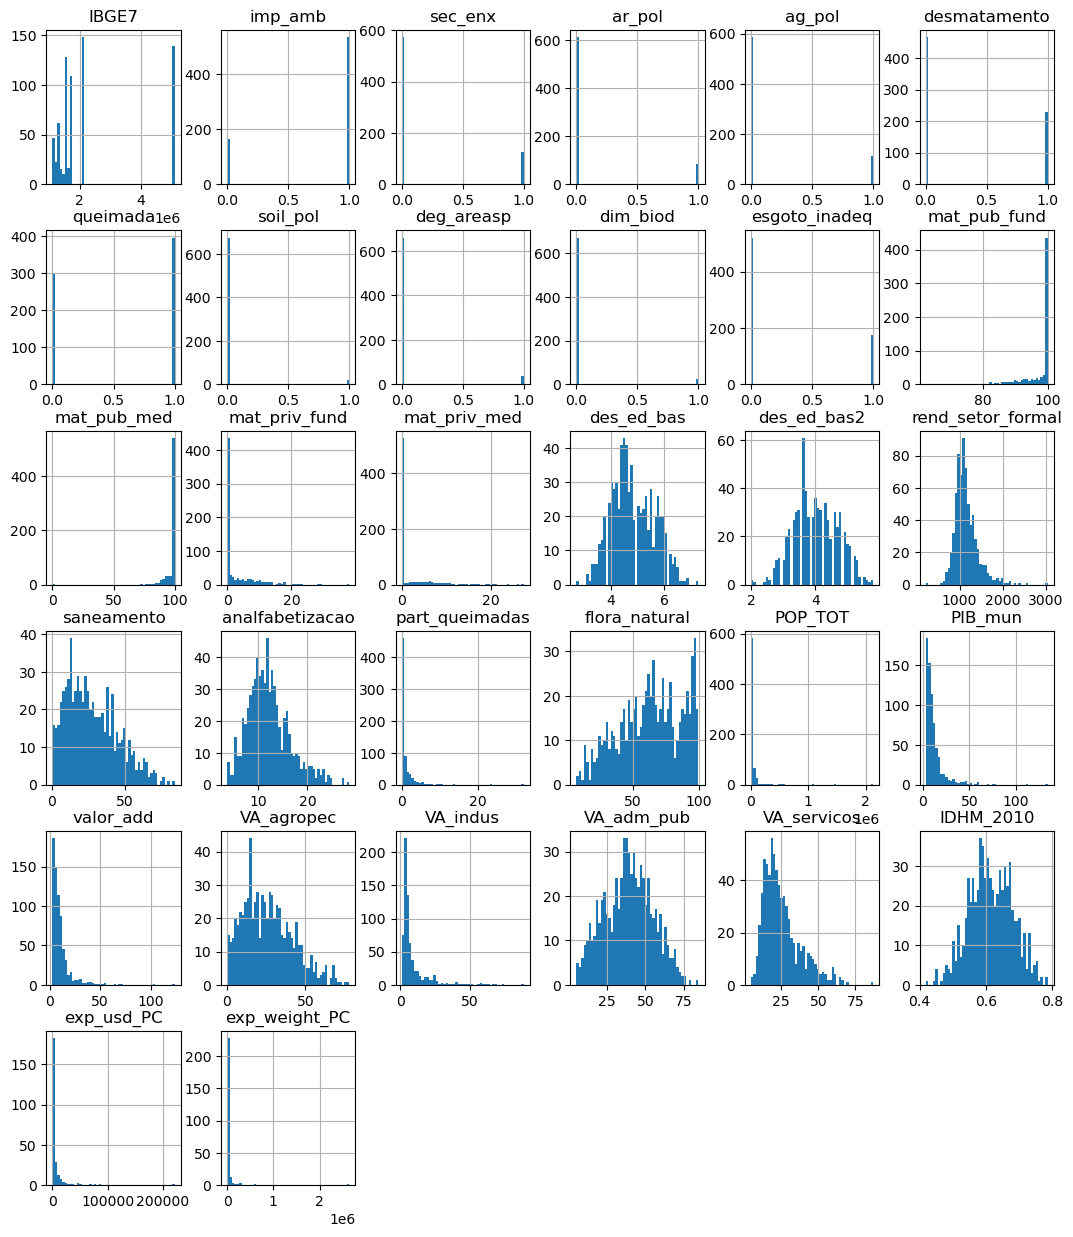

In [92]:
df_macro.hist(bins=50, figsize=(13, 15));

plt.show()

# Exemplos de predicoes do modelo

### Indice de desenvolvimento da educacao basica 1 - 5 ano

In [93]:
example = val_X.copy()

In [94]:
rf.predict(val_X.iloc[0:1])[0]

0.5959

In [95]:
# predicao do modelo mudando o indice de desenvolvimento da educacao basica do municipio de 4.6 para 6 e deixando 
# o resto das features constantes
example.loc[197, 'des_ed_bas'] = 6
rf.predict(example.iloc[0:1])[0]

0.6224141115434496

In [96]:
rf.predict(example.iloc[0:1])[0] - rf.predict(val_X.iloc[0:1])[0]

0.026514111543449626

O modelo indica que o IDH do municipio aumenta 0.022 pontos se for aumentado o desenvolvimento da educacao basica de 4.6 para 6 pontos

### Flora natural

In [97]:
example2 = val_X.copy()

In [98]:
val_X.loc[197, 'flora_natural']

58.67

In [99]:
# predicao do modelo mudando o indice de desenvolvimento da educacao basica do municipio de 4.6 para 6 e deixando 
# o resto das features constantes
example2.loc[197, 'flora_natural'] = 40
rf.predict(example2.iloc[0:1])[0]

0.5956899999999998

In [100]:
rf.predict(example2.iloc[0:1])[0] - rf.predict(val_X.iloc[0:1])[0]

-0.0002100000000001545

O modelo indica que o IDH do municipio aumenta apenas 0.0006 pontos se for diminuida a percentagem de flora natural de 60% para 40% e mantendo o resto das features constantes

### Analfabetizacao

In [101]:
example3 = val_X.copy()

In [102]:
val_X.loc[197, 'analfabetizacao']

10.03

In [103]:
# predicao do modelo mudando o indice de desenvolvimento da educacao basica do municipio de 4.6 para 6 e deixando 
# o resto das features constantes
example3.loc[197, 'analfabetizacao'] = 20
rf.predict(example3.iloc[0:1])[0] - rf.predict(val_X.iloc[0:1])[0]

-0.0434699999999999

O modelo indica que se a analfabetizacao for aumentada de 10% para 20% no municipio, o IDH diminuiria 0.036 pontos